**Кластеризация k-means**

In [8]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=100)

In [2]:
import numpy as np
import pandas as pd

def make_data(n, seed):
    np.random.seed(seed)
    
    shift_matrix = np.array([[3, 3], 
                             [6, 9], 
                             [9, 3]])
    
    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])
    
    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},
                      columns=['x', 'y'])
    df = df.sample(frac=1.0)

    return df

In [9]:
train = make_data(10, 42)
test = make_data(10, 27)

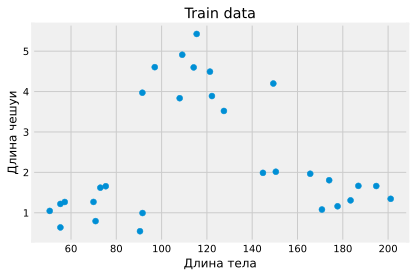

In [12]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

plt.scatter(train['x'], train['y'])

plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')

plt.title('Train data')

plt.show()

Нормализация данных

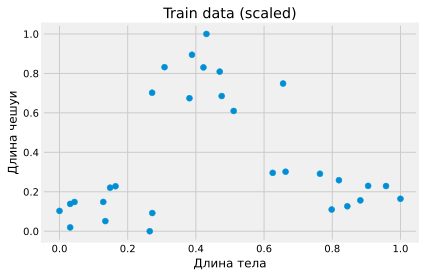

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_scaled = pd.DataFrame(scaler.fit_transform(train), columns=['x', 'y'])

plt.scatter(train_scaled['x'], train_scaled['y'])

plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')

plt.title('Train data (scaled)')

plt.show()

Построение модели кластеризации

In [14]:
train_labels = model.fit_predict(train_scaled)
train_labels

array([2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0,
       1, 1, 2, 2, 2, 0, 1, 1], dtype=int32)

**Центры кластеров**

In [17]:
model.cluster_centers_

array([[0.4314873 , 0.77857028],
       [0.12190576, 0.11495728],
       [0.82595794, 0.21634417]])

In [19]:
centers = scaler.inverse_transform(model.cluster_centers_)
centers

array([[115.56312871,   4.34494667],
       [ 68.96122223,   1.10467088],
       [174.94355655,   1.59972071]])

Text(0.5, 1.0, 'Train data')

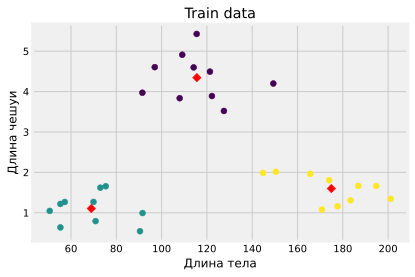

In [25]:
plt.scatter(train['x'], train['y'], c = train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker = 'D', color='red')

plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')

plt.title('Train data')

**Intertia**

In [22]:
model.inertia_

0.5417377477488049